In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

In [9]:
data = pd.read_csv('credit_customers.csv')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class',axis = 1), data['class'], test_size=0.2, random_state=42)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [12]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Credit_amount seems to be unbalanced

In [13]:
#check distribution of numerical feature
numeric = data.select_dtypes(exclude = 'O')
cate = data.select_dtypes(include = 'O')

In [14]:
numeric.nunique()

duration                   33
credit_amount             921
installment_commitment      4
residence_since             4
age                        53
existing_credits            4
num_dependents              2
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

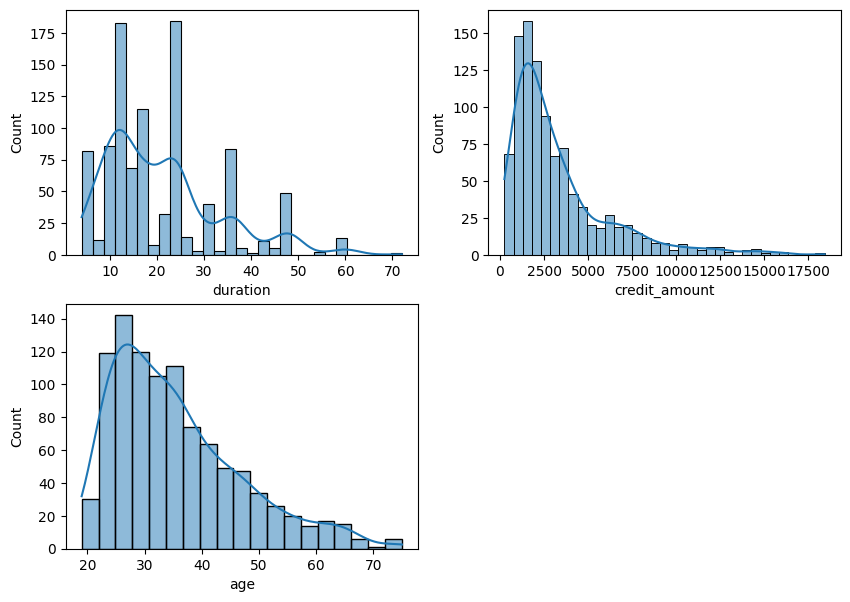

In [34]:
plt.figure(figsize=(10,7))
for i, j in enumerate(['duration','credit_amount','age']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = data, x = j, kde = True)

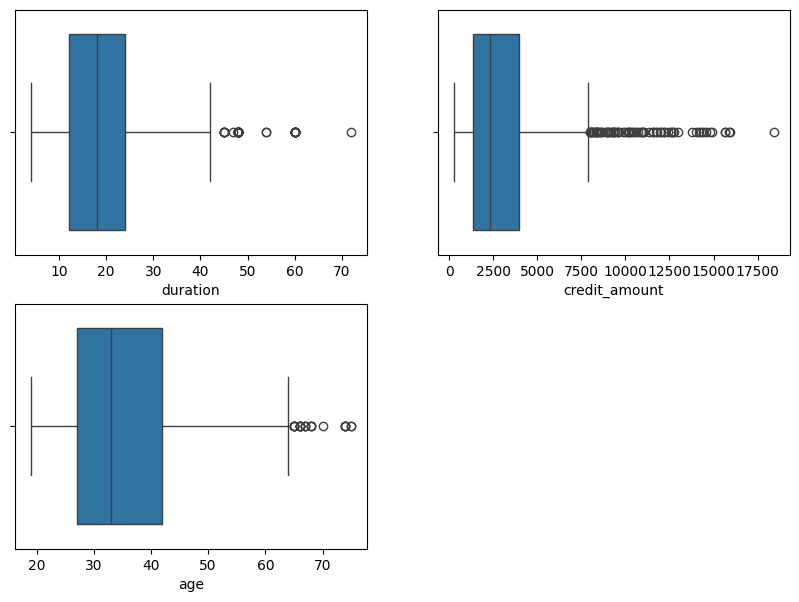

In [16]:
plt.figure(figsize=(10,7))
for i, j in enumerate(['duration','credit_amount','age']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = data, x = j)

credit_amount has outliers --> deal with it

<Axes: >

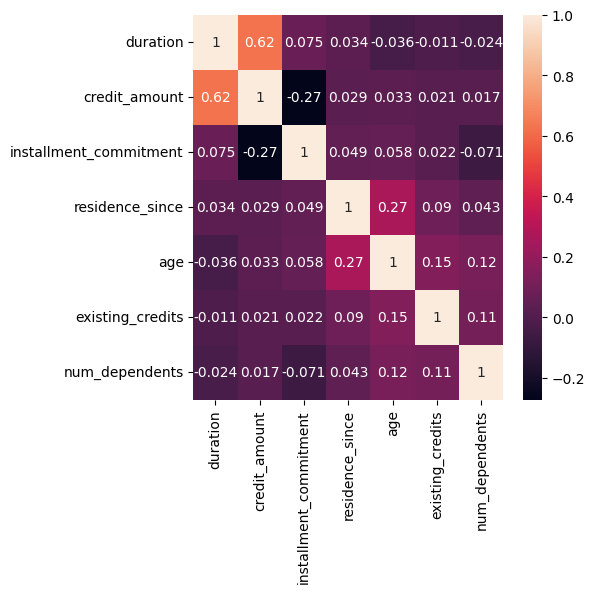

In [17]:
## check the correlation of numeric features
plt.figure(figsize = (5,5))
sns.heatmap(numeric.corr(), annot= True)

noticable correlation between credit_amout and duration, installment_commitment

In [18]:
# check corrlation all features (temporary)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

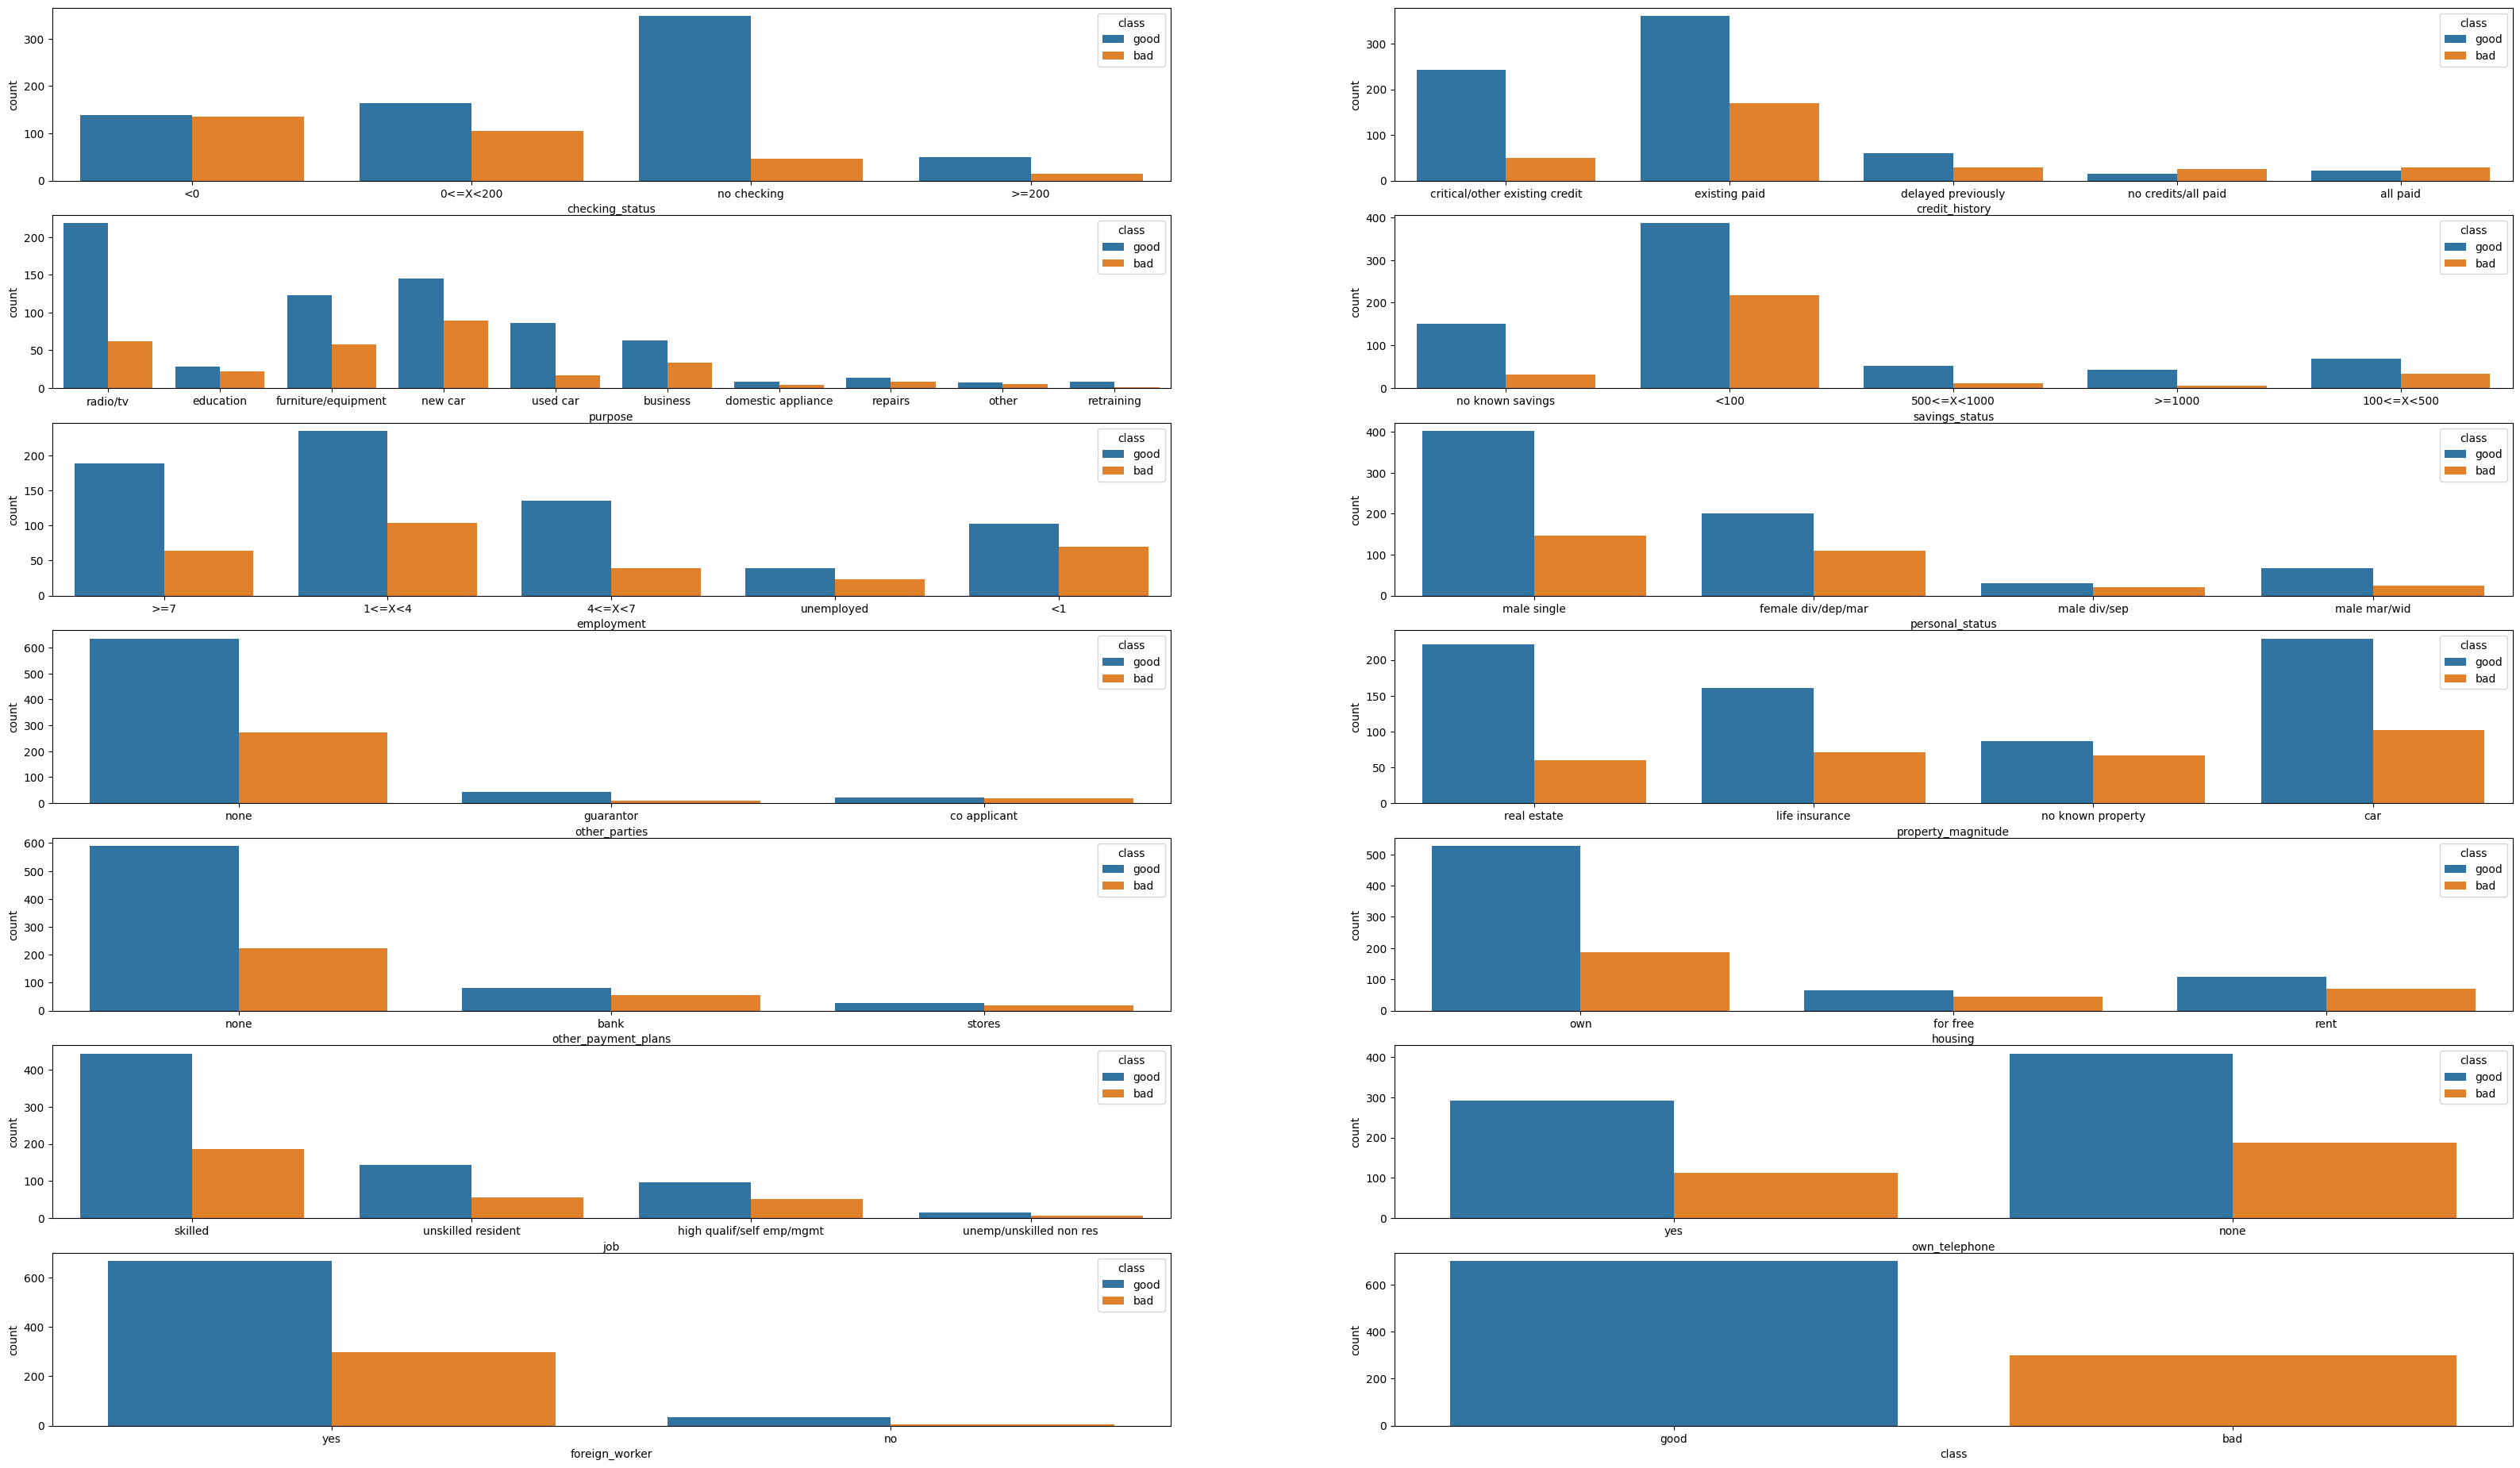

In [33]:
plt.figure(figsize=(40,30))
for i, j in enumerate(cate.columns):
    plt.subplot(9,2,i+1)
    sns.countplot(data=data,x = j, hue = 'class' )

Class seems to be unbalanced

### ENCODING CATEGORICAL FEATURES

In [20]:
to_ordinal = ['checking_status','savings_status','employment']
to_ordinal_df_train = X_train[to_ordinal]
to_ordinal_df_test = X_test[to_ordinal]

In [21]:
import numpy as np

In [22]:
oe = OrdinalEncoder(categories=[['no checking','<0', '0<=X<200','>=200']])
to_ordinal_df_train['checking_status'] = oe.fit_transform(to_ordinal_df_train[['checking_status']])
to_ordinal_df_test['checking_status'] = oe.transform(to_ordinal_df_test[['checking_status']])

In [23]:
ss = OrdinalEncoder(categories=[['no known savings', '<100', '100<=X<500','500<=X<1000', '>=1000']])
to_ordinal_df_train['savings_status'] = ss.fit_transform(to_ordinal_df_train[['savings_status']])
to_ordinal_df_test['savings_status'] = ss.transform(to_ordinal_df_test[['savings_status']])

emp = OrdinalEncoder(categories=[['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']])
to_ordinal_df_train['employment'] = emp.fit_transform(to_ordinal_df_train[['employment']])
to_ordinal_df_test['employment'] = emp.transform(to_ordinal_df_test[['employment']])


In [17]:
to_label = []
for i in cate.columns:
    if i not in to_ordinal:
        if i == 'class':
            continue
        to_label.append(i)
to_label_df_train = X_train[to_label]
to_label_df_test = X_test[to_label]


In [18]:
le = LabelEncoder()
for i in to_label:
    to_label_df_train[i] = le.fit_transform(to_label_df_train[i])
    to_label_df_test[i] = le.transform(to_label_df_test[i])

In [19]:
encoded_cate_train = pd.concat([to_ordinal_df_train,to_label_df_train],axis = 1)
encoded_cate_test = pd.concat([to_ordinal_df_test, to_label_df_test],axis = 1)

In [26]:
# label = LabelEncoder()
# y_train = label.fit_transform(y_train)
# y_test = label.transform(y_test)
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder(categories=[['good','bad']])
data['class'] = encode.fit_transform(data[['class']])
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,0.0
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,1.0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,0.0
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,0.0
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,1.0


In [ ]:
# plt.figure(figsize = (5,5))
# sns.heatmap(data = encoded_cate.corr()[['class']].sort_values(by = 'class',ascending=False), annot=True)

In [30]:
data  = pd.read_csv('credit_customers.csv')

In [31]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

([<matplotlib.patches.Wedge at 0x1d50b773110>,
 [Text(-0.6465637441936393, 0.8899187180267096, 'good'),
  Text(0.6465637441936392, -0.8899187180267097, 'bad')],
 [Text(-0.3526711331965305, 0.4854102098327506, '70.0%\n(700)'),
  Text(0.3526711331965304, -0.48541020983275074, '30.0%\n(300)')])

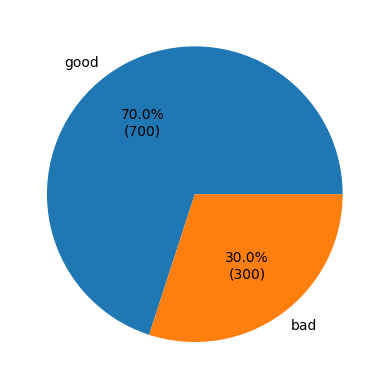

In [32]:
plt.pie(data['class'].value_counts(),labels=data['class'].unique(),autopct=autopct_format(data['class'].value_counts()))

In [26]:
processed_train = pd.concat([encoded_cate_train,numeric.iloc[X_train.index]],axis = 1)
processed_test = pd.concat([encoded_cate_test, numeric.iloc[X_test.index]], axis = 1)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
mm = MinMaxScaler()
train_scaled = pd.DataFrame(mm.fit_transform(processed_train), columns = mm.get_feature_names_out())
test_scaled = pd.DataFrame(mm.transform(processed_test), columns = mm.get_feature_names_out())

([<matplotlib.patches.Wedge at 0x20461059550>,
 [Text(-0.6430641520353796, 0.8924508369467857, '0'),
  Text(0.6430642355926548, -0.8924507767387705, '1')])

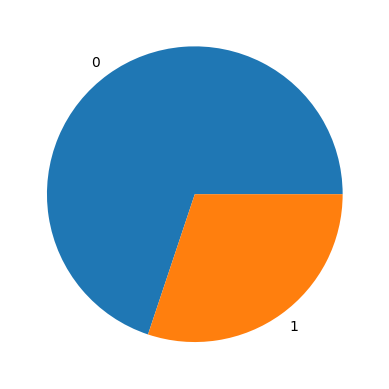

In [29]:
merged_train = train_scaled.copy()
merged_train['label'] = y_train
plt.pie(merged_train['label'].value_counts(), labels= merged_train['label'].unique())

In [30]:
merged_train['label'].value_counts()

label
1    559
0    241
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
import category_encoders as ce

In [32]:
to_woe = cate.drop('class',axis = 1).columns

In [33]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('class',axis = 1), data['class'], test_size=0.2, random_state=42)

In [34]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [35]:
enc = ce.WOEEncoder(cols = to_woe)
X_temp_train = enc.fit_transform(X_train,y_train)
X_temp_test = enc.transform(X_test)

In [4]:
import pandas as pd
import numpy as np
from scipy import stats

def cotinuous_var(Y, X, n=20):
    df = pd.DataFrame({"X": X, "Y": Y})
    bins = pd.cut(df.X, n)
    binned = df.groupby(bins)
    
    d3 = pd.DataFrame()
    d3["COUNT"] = binned.count().Y
    d3["EVENT"] = binned.sum().Y
    d3["NONEVENT"] = d3.COUNT - d3.EVENT
    
    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"].replace([np.inf, -np.inf], 0, inplace=True)
    d3["VAR_NAME"] = "VAR"
    
    return d3

def categorical_var(Y, X):
    df = pd.DataFrame({"X": X, "Y": Y})
    binned = df.groupby('X')
    
    d3 = pd.DataFrame()
    d3["COUNT"] = binned.count().Y
    d3["EVENT"] = binned.sum().Y
    d3["NONEVENT"] = d3.COUNT - d3.EVENT
    
    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"].replace([np.inf, -np.inf], 0, inplace=True)

    d3["VAR_NAME"] = "VAR"
    
    return d3

def data_vars(df, target):
    iv_df = pd.DataFrame()
    
    for col in df.columns:
        if df[col].dtype != "object":
            conv = cotinuous_var(target, df[col])
        else:
            conv = categorical_var(target, df[col])
        conv["VAR_NAME"] = col
            
        iv_df = pd.concat([iv_df, conv], ignore_index=True)
    
    iv = iv_df.groupby('VAR_NAME')['IV'].sum().reset_index()
    
    return iv_df, iv


In [5]:
woe_iv_df,IV = data_vars(data.drop('class',axis = 1),data['class'])

C:\Users\KyThuat88\AppData\Local\Temp\ipykernel_11128\2246100250.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d3["IV"].replace([np.inf, -np.inf], 0, inplace=True)
C:\Users\KyThuat88\AppData\Local\Temp\ipykernel_11128\2246100250.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = df.groupby(bins)
C:\Users\KyThuat88\AppData

In [6]:
woe_iv_df

,COUNT,EVENT,NONEVENT,EVENT_RATE,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV,VAR_NAME
0,269,105.0,164.0,0.390335,0.609665,0.350000,0.234286,0.401392,0.046447,checking_status
1,274,135.0,139.0,0.492701,0.507299,0.450000,0.198571,0.818099,0.205693,checking_status
2,63,14.0,49.0,0.222222,0.777778,0.046667,0.070000,-0.405465,0.009461,checking_status
3,394,46.0,348.0,0.116751,0.883249,0.153333,0.497143,-1.176263,0.404410,checking_status
4,87,9.0,78.0,0.103448,0.896552,0.030000,0.111429,-1.312186,0.106849,duration
...,...,...,...,...,...,...,...,...,...,...
189,155,46.0,109.0,0.296774,0.703226,0.153333,0.155714,-0.015409,0.000037,num_dependents
190,596,187.0,409.0,0.313758,0.686242,0.623333,0.584286,0.064691,0.002526,own_telephone
191,404,113.0,291.0,0.279703,0.720297,0.376667,0.415714,-0.098638,0.003852,own_telephone
192,37,4.0,33.0,0.108108,0.891892,0.013333,0.047143,-1.262915,0.042699,foreign_worker


In [7]:
IV

,VAR_NAME,IV
0,age,0.146137
1,checking_status,0.666012
2,credit_amount,0.218303
3,credit_history,0.293234
4,duration,0.295094
5,employment,0.086434
6,existing_credits,0.013267
7,foreign_worker,0.043877
8,housing,0.083293
9,installment_commitment,0.026322


In [35]:
IV[IV['IV'] < 0.02]['VAR_NAME'].unique()

array(['existing_credits', 'job', 'num_dependents', 'own_telephone',
       'residence_since'], dtype=object)

In [45]:
data.groupby(['checking_status','class'])['duration'].count()

checking_status  class
0<=X<200         0.0      164
                 1.0      105
<0               0.0      139
                 1.0      135
>=200            0.0       49
                 1.0       14
no checking      0.0      348
                 1.0       46
Name: duration, dtype: int64

In [ ]:
mm = MinMaxScaler()
scaled_train = mm.fit_transform(X_temp_train,y_train)
scaled_test = mm.transform(X_temp_test)

In [ ]:
smote = SMOTE(random_state= 42)
X = scaled_train
y = y_train
#print('Orginal class:', y.value_counts())
X_re,y_re = smote.fit_resample(X,y)
#print('Resampled class:', y_re.value_counts())

In [36]:
#deal with outliers
from scipy import stats
def remove_outliers(df,col):
    colum = df[col]
    remove = colum[np.abs(stats.zscore(colum)) < 2]
    return df.iloc[remove.index]

In [38]:
removed = remove_outliers(data,'credit_amount')
removed.shape

(945, 21)

Text(0.5, 1.0, 'After removed')

<Figure size 1000x1000 with 0 Axes>

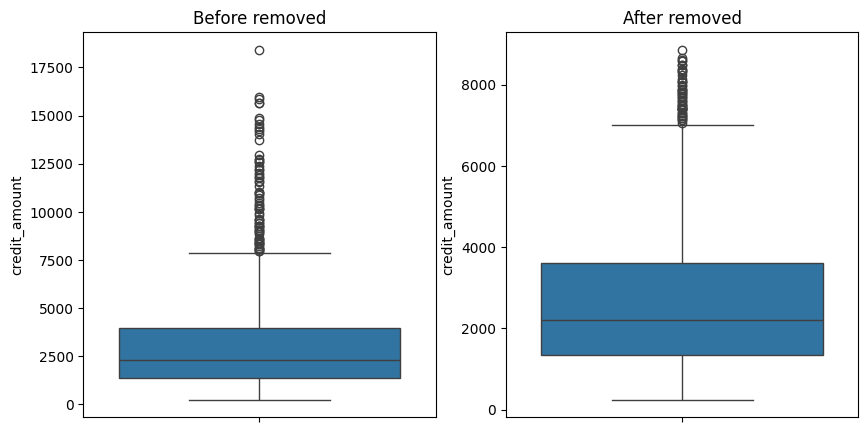

In [39]:
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=data['credit_amount'],ax = ax[0])
ax[0].set_title('Before removed')
sns.boxplot(data=removed['credit_amount'],ax = ax[1])
ax[1].set_title('After removed')

In [ ]:
X_balanced = train_balanced.drop('label',axis = 1)
y_balanced = train_balanced['label']

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_re,y_re)
pred = model.predict(scaled_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test, pred))

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
roc_auc_score(y_test,pred)

In [38]:
def max_filter(df,col_fil, col_val):
    max_df = pd.DataFrame(columns=df.columns)
    for i in df[col_fil].unique():
        max = df[df[col_fil] == i].sort_values(by = col_val,ascending = False).head(1)
        max_df = pd.concat([max_df,max],ignore_index = True)
    return max_df


In [39]:
maxi = max_filter(result_df,'model','roc_auc')

C:\Users\KyThuat88\AppData\Local\Temp\ipykernel_6008\1285249012.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_df = pd.concat([max_df,max],ignore_index = True)


<Axes: xlabel='model', ylabel='roc_auc'>

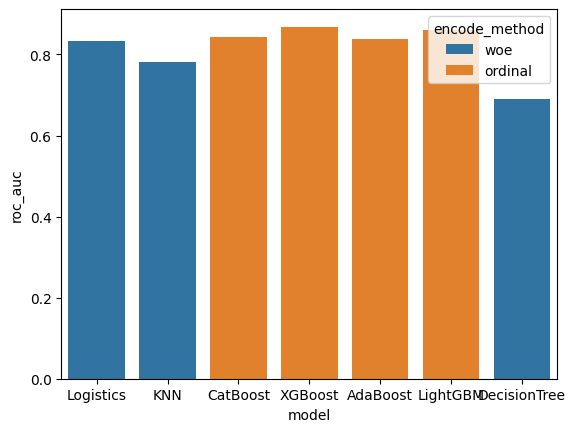

In [50]:
import seaborn as sns
sns.barplot(data=maxi,x = 'model', y = 'roc_auc',hue = 'encode_method')

In [43]:
chot_result = result_df

In [46]:
def max_filter(df,col_fil, col_val):
    max_df = pd.DataFrame(columns=df.columns)
    for i in df[col_fil].unique():
        max = df[df[col_fil] == i].sort_values(by = col_val,ascending = False).head(1)
        max_df = pd.concat([max_df,max],ignore_index = True)
    return max_df

In [48]:
maxed = max_filter(chot_result,'model','f1_score')

<Axes: xlabel='model', ylabel='f1_score'>

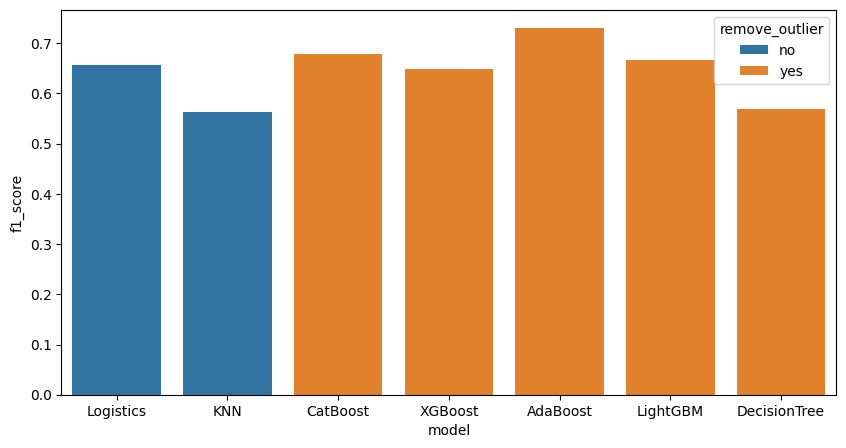

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = maxed,x = 'model',y = 'f1_score',hue = 'remove_outlier')
# plt.figure(figsize=(15,10))
# lis = chot_result['model'].unique()
# for i, j in enumerate(lis):
#     plt.subplot(2,2,i+1)
#     sns.barplot(data=data,x = 'model',y = j,hue = 'scale_method')

In [23]:
result1 = pd.read_csv('no_tune_selected.csv')
result1[result1['model'] == 'AdaBoost'].sort_values('f1_score', ascending = False).head(2)

,model,remove_outlier,rebalance_data,encode_method,scale_method,accuracy,recall,f1_score,precision,roc_auc
64,AdaBoost,yes,yes,ordinal,minmax,0.83,0.779661,0.730159,0.686567,0.832552
72,AdaBoost,no,yes,ordinal,minmax,0.79,0.762712,0.681818,0.616438,0.828705
